# Rainfall Prediction Using Regression

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data=pd.read_csv(r"Data set - Rainfall Prediction.csv")

In [4]:
data.head(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
data.tail(5)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4115,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [7]:
data.shape

(4116, 19)

In [12]:
data.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [9]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [10]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_18848\2538008688.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = monthly_rainfall.corr()


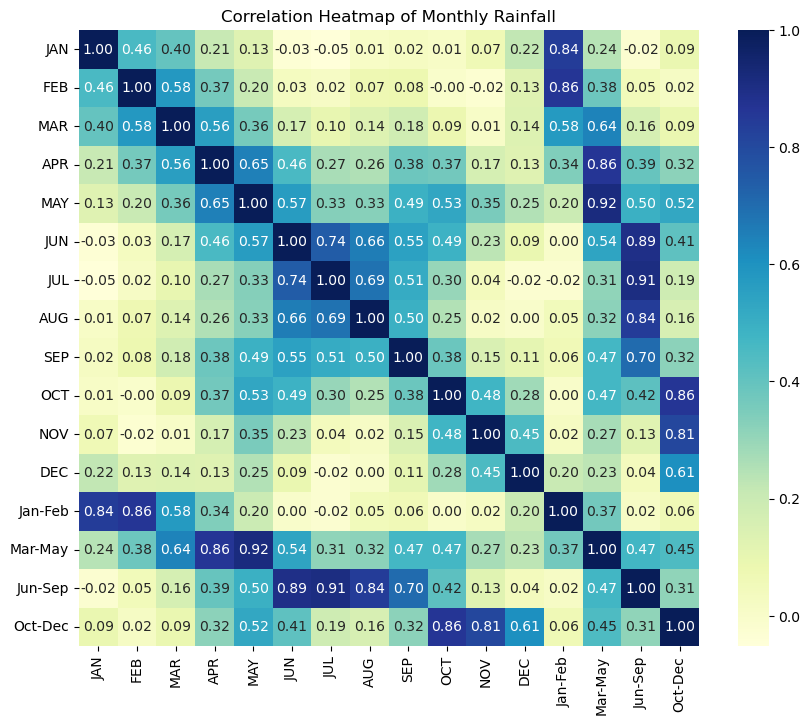

In [14]:
monthly_rainfall = data.drop(columns=['YEAR', 'ANNUAL'])
correlation_matrix = monthly_rainfall.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Heatmap of Monthly Rainfall')
plt.show()

In [18]:
data.fillna(data.mean(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_18848\1474580016.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [19]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [29]:
X = data.drop(columns=['YEAR', 'ANNUAL','SUBDIVISION'])
y = data['ANNUAL']

In [30]:
X.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,136.3,560.3,1696.3,980.3
1,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,159.8,458.3,2185.9,716.7
2,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,156.7,236.1,1874.0,690.6
3,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,24.1,506.9,1977.6,571.0
4,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,1.3,309.7,1624.9,630.8


In [31]:
y.head()

0    3373.2
1    3520.7
2    2957.4
3    3079.6
4    2566.7
Name: ANNUAL, dtype: float64

In [32]:
#splitting dataset into 70% training and 30% testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
Reg_model = LinearRegression()

In [34]:
Reg_model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = Reg_model.predict(X_test)

In [39]:
y_pred

array([ 786.90470365, 1543.72307063, 1183.88154024, ..., 1335.70608764,
       1119.32940999,  516.6021704 ])

In [36]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1969.217920010221


In [37]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.99768072963763


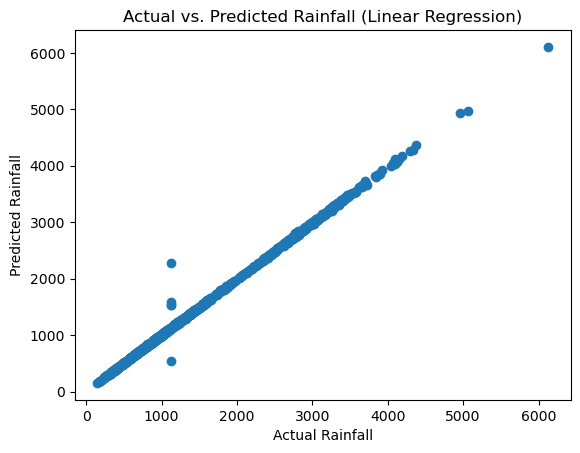

In [38]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs. Predicted Rainfall (Linear Regression)')
plt.show()

In [51]:
data['Predicted_Rainfall'] = Reg_model.predict(X)

In [52]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Predicted_Rainfall
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,3355.702540
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,3471.885417
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2946.610619
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,3097.913357
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2548.661673
